# Supervised Machine Learning in Python

In [1]:
# Import Packages
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics
import numpy as np

In [3]:
realestate = pd.read_csv(r'C:\Users\nikki\OneDrive\Pictures\Data Science\106 - Machine Learning and Modeling\Machine Learning\L1 Introduction to Machine Learning\realestate.csv')
realestate.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [7]:
# Column Names
for col in realestate.columns:
    print(col)

No
X1 transaction date
X2 house age
X3 distance to the nearest MRT station
X4 number of convenience stores
X5 latitude
X6 longitude
Y house price of unit area


# Goal
### With the above data, my goal is to accurately predict housing prices.
This variable is conveniently labeled Y house price of unit area. I will use X variables numbered 2-6 to determine housing prices.
When completed, if desired, I should be able to take completely new data, maybe from a new geographic location, and predict housing prices there.



## Data Wranlging
Create x and y variables

In [6]:
x = realestate[['X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 latitude', 'X6 longitude']]
y = realestate['Y house price of unit area']


## Train Test Split

### Acceptable splits: 80/20, 70/30, 60/40

In [10]:
# Code for splitting data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = .4, random_state=101)

In [9]:
# See the shape of your data
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(248, 5) (248,)
(166, 5) (166,)


## Create the Linear Regression Model

In [11]:
lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression()

# Interpreting Supervised Machine Learning Model Accuracy

In [12]:
predictions = lm.predict(x_test)
predictions

array([14.77852916,  8.35848599, 23.1113017 , 47.67384657, 30.05251015,
       37.468435  , 38.01762284, 41.08294225, 46.50080685, 40.34536509,
       43.87818623, 33.77279613, 40.08116941, 37.31066596, 46.15211908,
       48.22093568, 39.48594154, 46.43844951, 49.94962395, 47.552992  ,
       41.60580876, 52.60152777, 47.16226231, 37.48194878, 32.40811002,
       50.67597957, 39.35917038, 47.99287312, 45.4694465 , 39.33112551,
       49.61736207, 42.53188577, 42.96261018, 46.15577268, 44.94124757,
        7.13730951, 39.15074038, 39.77497805,  7.07979164, 54.43242047,
       31.26660065, 46.90435905, 24.89017208, 48.80711134, 42.6710441 ,
       50.08982154, 41.0044385 , 37.39701978, 44.86394799, 36.76558821,
       46.8133099 , 35.89912014, 42.35933217, 14.7421879 , 38.74428879,
       47.50157796, 43.06612319, 45.44985241, 43.77496083, 39.48259244,
       34.31225036, 45.52392252, 42.44560897, 42.0625614 , 51.89857656,
       42.74806676, 24.28752167, 48.68058491, 31.25018334, 40.06

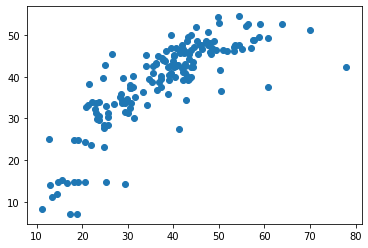

In [13]:
# View ML Results
plt.scatter(y_test, predictions)

# Accuracy Score
### Our model is accurate 64% of the time - not bad in the real world

In [14]:
print("Score:", lm.score(x_test, y_test))


Score: 0.64423808451217


# Examining Error
##  The main thing to know about interpreting error is that the smaller the error value, the better, and they range from zero to infinity. You want as close to zero as you can get.

## Mean Absolute Error (MAE)

In [15]:
metrics.mean_absolute_error(y_test, predictions)

5.550201321415549

## Mean Squared Error (MSE)

In [16]:
metrics.mean_squared_error(y_test, predictions)

54.375728544922424

## Root Mean Square Error (RMSE)

In [17]:
np.sqrt(metrics.mean_squared_error(y_test, predictions))


7.373990001683107

# K-Fold Cross Validation

In [22]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [24]:
# Create the Folds
kfold = KFold(3)
for train, test in kfold.split(x,y):
    print('train: %s, test: %s' % (train,test))

train: [138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155
 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173
 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191
 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209
 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227
 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245
 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263
 264 265 266 267 268 269 270 271 272 273 274 275 276 277 278 279 280 281
 282 283 284 285 286 287 288 289 290 291 292 293 294 295 296 297 298 299
 300 301 302 303 304 305 306 307 308 309 310 311 312 313 314 315 316 317
 318 319 320 321 322 323 324 325 326 327 328 329 330 331 332 333 334 335
 336 337 338 339 340 341 342 343 344 345 346 347 348 349 350 351 352 353
 354 355 356 357 358 359 360 361 362 363 364 365 366 367 368 369 370 371
 372 373 374 375 376 377 378 379 380 381 382

In [25]:
print(cross_val_score(lm, x,y, cv=3))


[0.62051774 0.50393467 0.55970703]


## Interpret Results
You’ll notice that these scores vary somewhat. That is to be expected. Looks like the first trained model was accurate 62% of the time, while the second model was accurate 50% of the time and the third model was accurate 56% of the time.

Using cross-validation, your model has now been thoroughly tested, and you should feel secure in your knowledge that you have created a rigorous model that has stood up to some serious testing! You also have a better idea of how the accuracy might vary.

